Accuracy: 62.71%


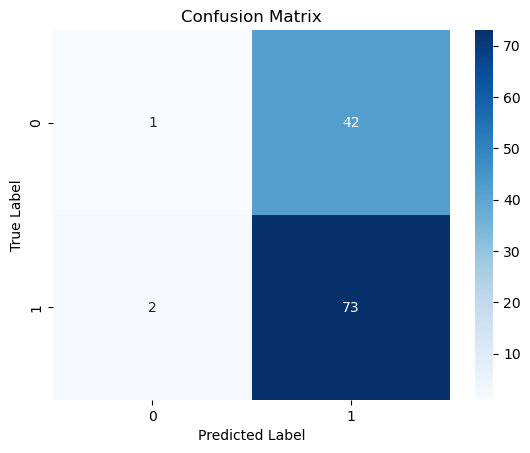

Done Boss !!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Lead-V3.csv')

# Separate the target variable from the features
X = df.iloc[:, :5000]
y = df.iloc[:, 5000]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=100)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train a Logistic Regression classifier
lr_clf = LogisticRegression(max_iter=1000, C=1, random_state=42)

# Train a Support Vector Machine classifier
svm_clf = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)

# Use a voting classifier to combine the predictions of the classifiers
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', lr_clf), ('svm', svm_clf)], voting='hard')

# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('Done Boss !!')